## Mixture Models

https://en.wikipedia.org/wiki/Mixture_model

http://blog.mrtz.org/2014/04/22/pearsons-polynomial.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



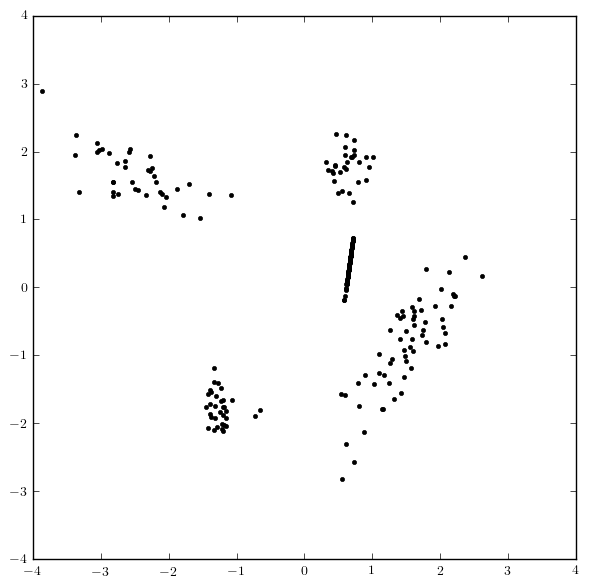

In [107]:
# Limits of the domain
Lim = 4

# Number of mixture components
N = 5

# Generate random mixture parameters
w = np.random.rand(N)
w = w/np.sum(w)
mu = []
Sig = []

for i in range(N):
    mu.append(np.random.randn(2))
    A = np.random.randn(2,2)/3
    Sig.append(A.dot(A.T))
    
# Number of data points
T = N*50
# Number of points from each cluster center
Ts = np.random.multinomial(T, w)
X = []
for i in range(N):
    x = np.random.multivariate_normal(mu[i], Sig[i], Ts[i])
    X.append(x)


plt.figure(figsize=(7,7))
plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

ax = plt.gca()
ax.set_xlim(-Lim,Lim)
ax.set_ylim(-Lim,Lim)
    
for i in range(N):
    plt.plot(X[i][:,0],X[i][:,1],'.k')

    
plt.show()


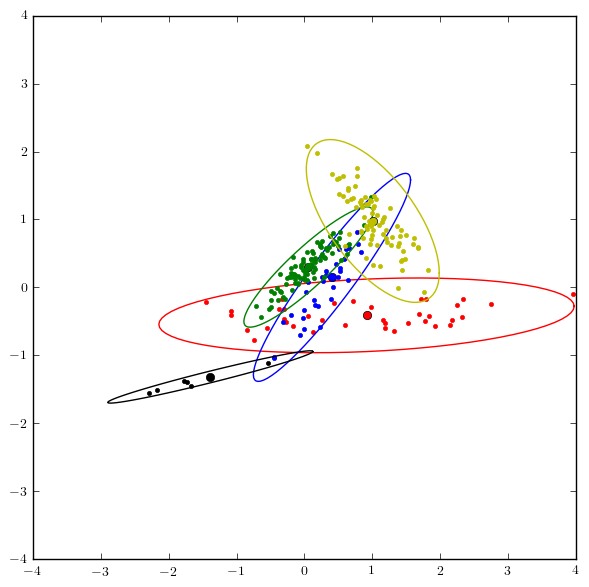

In [94]:
def ellipse_line(A, mu=np.array([0,0]), col='b'):
    '''
    Creates an ellipse from short line segments y = A x + \mu 
    where x is on the unit circle.
    '''
    N = 36
    th = np.arange(0, 2*np.pi+np.pi/N, np.pi/N)
    X = np.array([np.cos(th),np.sin(th)])
    
    Y = np.dot(A, X)
    ln = plt.Line2D(mu[0]+Y[0,:],mu[1]+Y[1,:],markeredgecolor='k', linewidth=1, color=col)
    return ln


col = ['r','b','g','k','y','m']
plt.figure(figsize=(7,7))
plt.rc('text', usetex=True)

ax = plt.gca()
ax.set_xlim(-Lim,Lim)
ax.set_ylim(-Lim,Lim)
for i in range(N):
    A = np.linalg.cholesky(Sig[i])
    m = mu[i]
    
    plt.plot(m[0],m[1],'o'+col[i%len(col)])
    plt.plot(X[i][:,0], X[i][:,1], '.'+col[i%len(col)])
    ln = ellipse_line(3*A, m, col[i%len(col)])
    ax.add_line(ln)
    #ax.set_axis_off()
